In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('C:/Users/Mehmet Alpay/Desktop/Software/anaconda kodlama/applerevenue .csv')
dataset.head()

,date,open,high,low,close,volume,profit or not
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0


In [3]:
dataset.describe()

,open,high,low,close,volume,profit or not
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


In [4]:
X = dataset.drop(columns=['date', 'profit or not', 'volume'])
Y = dataset['profit or not']
X.head()

,open,high,low,close
0,0.1003,0.1007,0.1003,0.1003
1,0.0955,0.0955,0.0951,0.0951
2,0.0885,0.0885,0.0881,0.0881
3,0.0902,0.0907,0.0902,0.0902
4,0.0929,0.0933,0.0929,0.0929


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.35, random_state=42)
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((6863, 4), (3696, 4), (6863,), (3696,))

In [6]:
training_model = LogisticRegression(class_weight='balanced')
training_model.fit(x_train, y_train)
y_train_prediction = training_model.predict(x_train)
y_train_prediction

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [7]:
training_model.score(x_train, y_train)

0.998542911263296

In [8]:
training_cf_matrix = confusion_matrix(y_train, y_train_prediction)

training_cf_matrix

array([[3585,    6],
       [   4, 3268]], dtype=int64)

In [9]:
b = pd.DataFrame(training_cf_matrix)
b.rename(columns = {0: 'True', 1:'False'}, inplace = True)
b

,True,False
0,3585,6
1,4,3268


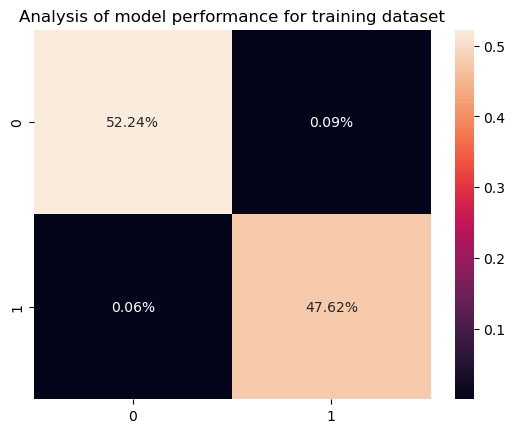

In [11]:
sns.heatmap(training_cf_matrix/np.sum(training_cf_matrix), annot=True, fmt='.2%')
plt.title('Analysis of model performance for training dataset')
plt.show()

In [12]:
y_test_prediction = training_model.predict(x_test)
y_test_prediction

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [13]:
training_model.score(x_test, y_test)

0.9962121212121212

In [14]:
testing_cf_matrix = confusion_matrix(y_test, y_test_prediction)
testing_cf_matrix

array([[1931,    6],
       [   8, 1751]], dtype=int64)

In [15]:
a = pd.DataFrame(testing_cf_matrix)
a.rename(columns = {0: 'True', 1:'False'}, inplace = True)
a

,True,False
0,1931,6
1,8,1751


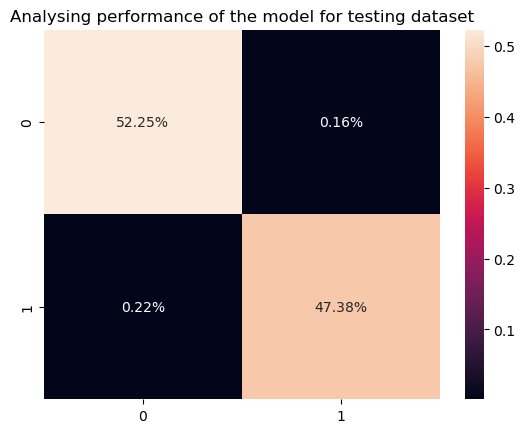

In [16]:
sns.heatmap(testing_cf_matrix/np.sum(testing_cf_matrix), annot=True, fmt='0.2%')
plt.title('Analysing performance of the model for testing dataset')
plt.show()